<a href="https://colab.research.google.com/github/Nabarup1/Developing-Advanced-Machine-Learning-Models-for-Algorithmic-Trading-in-BTC-USDT/blob/main/TESLA_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tesla (TSLA) Stock Price prediction using Facebook Prophet

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [ ]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [ ]:
import pandas as pd
import plotly.express as px
import prophet as Prophet

In [ ]:
#Initializing Plotly
import plotly.io as pio
pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [ ]:
# df= dataframe
df=pd.read_csv("suzlon.csv")

In [ ]:
#read_csv function from pandas

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-08,7.480000,7.750000,7.48,7.680000,7.680000,28729470.0
1,2022-08-10,7.870000,7.940000,7.34,7.380000,7.380000,21440690.0
2,2022-08-11,7.700000,7.880000,7.61,7.680000,7.680000,16786490.0
3,2022-08-12,7.810000,7.830000,7.46,7.530000,7.530000,16041820.0
4,2022-08-16,7.650000,7.700000,7.58,7.680000,7.680000,14461850.0
...,...,...,...,...,...,...,...
241,2023-07-31,NaN,NaN,NaN,NaN,NaN,NaN
242,2023-08-01,NaN,NaN,NaN,NaN,NaN,NaN
243,2023-08-02,NaN,NaN,NaN,NaN,NaN,NaN
244,2023-08-03,18.469999,18.469999,17.73,17.969999,17.969999,22688310.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       246 non-null    object 
 1   Open       231 non-null    float64
 2   High       231 non-null    float64
 3   Low        231 non-null    float64
 4   Close      231 non-null    float64
 5   Adj Close  231 non-null    float64
 6   Volume     231 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.6+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,231.000000,231.000000,231.000000,231.000000,231.000000,2.310000e+02
mean,9.741082,10.011775,9.498874,9.741385,9.741385,3.690591e+07
std,2.653413,2.721607,2.588036,2.673947,2.673947,3.100488e+07
min,6.720000,6.950000,6.600000,6.700000,6.700000,4.519749e+06
25%,8.140000,8.295000,8.010000,8.120000,8.120000,1.893324e+07
50%,8.830000,9.090000,8.560000,8.810000,8.810000,2.747314e+07
75%,10.185000,10.345000,9.900000,10.090000,10.090000,4.268252e+07
max,20.400000,20.639999,19.219999,20.000000,20.000000,2.807229e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [ ]:
px.area(df, x="Date", y="Close")

In [ ]:
px.line(df,x='Date',y='Volume' )

In [ ]:
px.bar(df, y="Volume")

In [ ]:
px.box(df, y="Close")

# Understanding Facebook Prophet

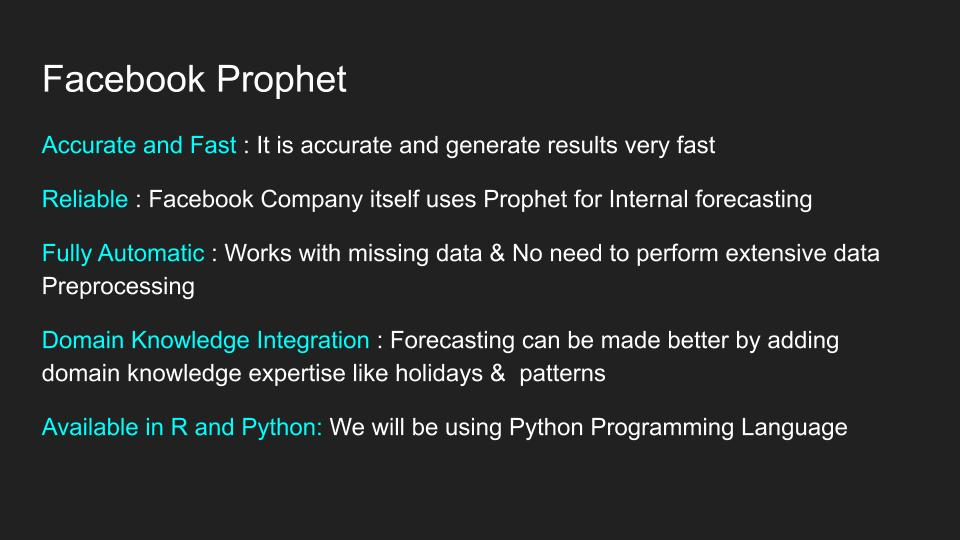

## Data Preperation

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-08,7.480000,7.750000,7.48,7.680000,7.680000,28729470.0
1,2022-08-10,7.870000,7.940000,7.34,7.380000,7.380000,21440690.0
2,2022-08-11,7.700000,7.880000,7.61,7.680000,7.680000,16786490.0
3,2022-08-12,7.810000,7.830000,7.46,7.530000,7.530000,16041820.0
4,2022-08-16,7.650000,7.700000,7.58,7.680000,7.680000,14461850.0
...,...,...,...,...,...,...,...
241,2023-07-31,NaN,NaN,NaN,NaN,NaN,NaN
242,2023-08-01,NaN,NaN,NaN,NaN,NaN,NaN
243,2023-08-02,NaN,NaN,NaN,NaN,NaN,NaN
244,2023-08-03,18.469999,18.469999,17.73,17.969999,17.969999,22688310.0


In [ ]:
columns=["Date","Close" ]
ndf = pd.DataFrame(df, columns=columns)

In [ ]:
ndf

,Date,Close
0,2022-08-08,7.680000
1,2022-08-10,7.380000
2,2022-08-11,7.680000
3,2022-08-12,7.530000
4,2022-08-16,7.680000
...,...,...
241,2023-07-31,NaN
242,2023-08-01,NaN
243,2023-08-02,NaN
244,2023-08-03,17.969999


In [ ]:
prophet_df = ndf.rename(columns = {'Date':'ds','Close':'y'})

## Creating Facebook Prophet Model

In [ ]:
m = Prophet.Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq7jb87jq/9mwvsu6z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq7jb87jq/74gt1tdd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5723', 'data', 'file=/tmp/tmpq7jb87jq/9mwvsu6z.json', 'init=/tmp/tmpq7jb87jq/74gt1tdd.json', 'output', 'file=/tmp/tmpq7jb87jq/prophet_modela3puv9tl/prophet_model-20230806113728.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:37:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:37:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [ ]:
future =m.make_future_dataframe(periods = 30)
forecast = m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-08-08,8.249240,7.471967,9.389537,8.249240,8.249240,0.198292,0.198292,0.198292,0.198292,0.198292,0.198292,0.0,0.0,0.0,8.447532
1,2022-08-10,8.252897,7.392408,9.391981,8.252897,8.252897,0.139020,0.139020,0.139020,0.139020,0.139020,0.139020,0.0,0.0,0.0,8.391917
2,2022-08-11,8.254725,7.361083,9.309943,8.254725,8.254725,0.080868,0.080868,0.080868,0.080868,0.080868,0.080868,0.0,0.0,0.0,8.335593
3,2022-08-12,8.256553,7.347056,9.320669,8.256553,8.256553,0.064394,0.064394,0.064394,0.064394,0.064394,0.064394,0.0,0.0,0.0,8.320947
4,2022-08-16,8.263866,7.442241,9.401563,8.263866,8.263866,0.109396,0.109396,0.109396,0.109396,0.109396,0.109396,0.0,0.0,0.0,8.373262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,2023-08-30,23.012409,22.125236,24.245626,22.738673,23.267242,0.139020,0.139020,0.139020,0.139020,0.139020,0.139020,0.0,0.0,0.0,23.151430
272,2023-08-31,23.140009,22.224869,24.309514,22.846323,23.413756,0.080868,0.080868,0.080868,0.080868,0.080868,0.080868,0.0,0.0,0.0,23.220877
273,2023-09-01,23.267608,22.280307,24.397050,22.957542,23.561287,0.064394,0.064394,0.064394,0.064394,0.064394,0.064394,0.0,0.0,0.0,23.332002
274,2023-09-02,23.395207,22.037222,24.161245,23.069093,23.708556,-0.295985,-0.295985,-0.295985,-0.295985,-0.295985,-0.295985,0.0,0.0,0.0,23.099222


In [ ]:
px.line(forecast, x="ds",y="yhat")

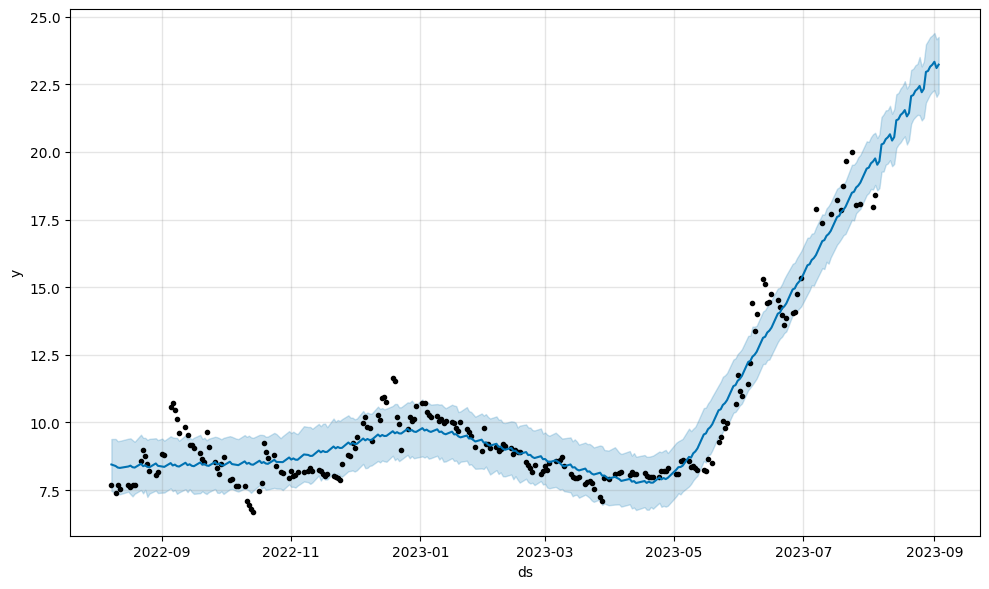

In [ ]:
figure = m.plot(forecast, xlabel='ds', ylabel="y")

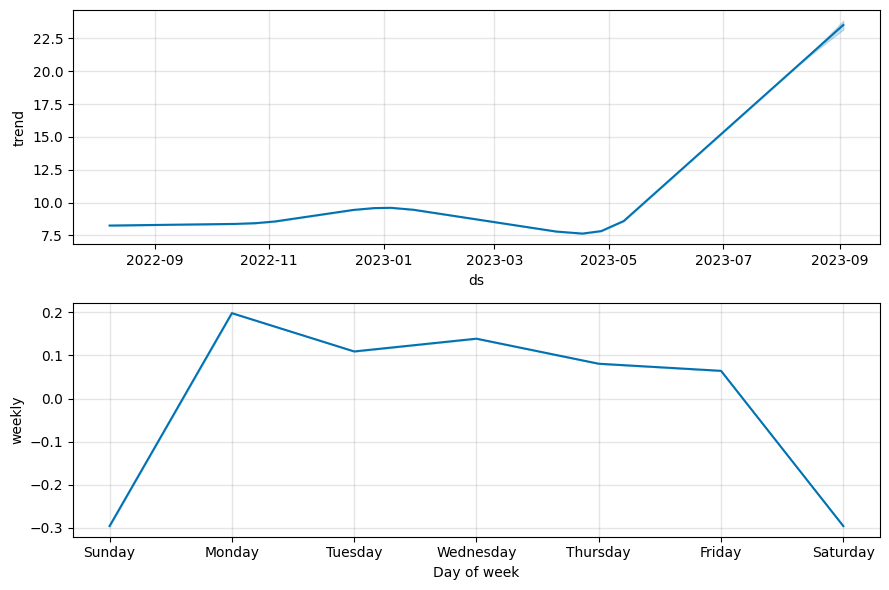

In [ ]:
figure2= m.plot_components(forecast)

##Downloading the Forecast data

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>